In [45]:
import numpy as np
import json
import os 
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [4]:
sequences_file = os.path.join('..', 'data', 'protein-seqs-1.txt')
functions_file = os.path.join('..', 'data', 'protein-functions-1.txt')

In [5]:
with open(functions_file) as fn_file:
    has_function = json.load(fn_file)

In [6]:
has_function

['P27361',
 'P53779',
 'Q9UHC1',
 'Q9NYL2',
 'O15440',
 'P33527',
 'Q92887',
 'O15438',
 'O15439',
 'Q5T3U5',
 'P42345',
 'O75648',
 'Q16659',
 'Q8NB16',
 'Q02750',
 'O95255',
 'O95396',
 'O43196',
 'P46734',
 'P49914',
 'Q6DT37',
 'Q9H3H1',
 'Q9HCE1',
 'P52564',
 'Q9Y5S2',
 'Q96J65',
 'P20585',
 'O15457',
 'P52701',
 'Q5VT25',
 'A7E2Y1',
 'Q9UKN7',
 'Q9Y6X6',
 'Q96MN2',
 'P13535',
 'Q32MK0',
 'O43795',
 'O00159',
 'Q9UM54',
 'Q13402',
 'Q9UKX2',
 'P13533',
 'Q9H1R3',
 'Q8WXR4',
 'Q6PIF6',
 'B2RTY4',
 'Q6IA69',
 'Q86W25',
 'Q9UKX3',
 'Q7Z406',
 'P12882',
 'Q15746',
 'O15146',
 'Q9Y623',
 'P12883',
 'P35579',
 'B0I1T2',
 'Q9Y4I1',
 'Q96JP2',
 'Q8IUG5',
 'Q9UBC5',
 'O00160',
 'P53602',
 'Q92614',
 'P35749',
 'P11055',
 'Q9Y2K3',
 'Q86YV6',
 'Q9HD67',
 'Q8N1T3',
 'Q9ULV0',
 'Q13459',
 'Q86W26',
 'P59046',
 'Q9UJ70',
 'Q86W24',
 'Q13232',
 'Q9H0A0',
 'P22392',
 'Q8IY84',
 'Q86WI3',
 'Q96P20',
 'Q86UW6',
 'Q8IVL1',
 'O75414',
 'Q8NG66',
 'Q96PY6',
 'P35580',
 'Q96H55',
 'O94832',
 'Q12965',

In [8]:
max_sequence_size = 500 #only 500 chain lenth is considered

X = []          
y = []  

pos_examples = 0
neg_examples = 0  

In [9]:
with open(sequences_file) as f:
    for line in f:
        ln = line.split(',')
        protein_id = ln[0].strip()
        seq = ln[1].strip()

        # we're doing this to reduce input size
        if len(seq) >= max_sequence_size:
            continue
        
        print(line)
        
        X.append(seq)
        
        if protein_id in has_function: 
            y.append(1) 
            pos_examples += 1 
        else: 
            y.append(0) 
            neg_examples += 1 

P27361,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP

P53779,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDNQFYSVEVGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAVLDRNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIISLLNVFTPQKTLEEFQDVYLVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMMTPYVVTRYYRAPEVILGMGYKENVDIWSVGCIMGEMVRHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRNYVENRPKYAGLTFPKLFPDSLFPADSEHNKLKASQARDLLSKMLVIDPAKRISVDDALQHPYINVWYDPAEVEAPPPQIYDKQLDEREHTIEEWKELIYKEVMNSEEKTKNGVVKGQPSPSGAAVNSSESLPPSSSVNDISSMSTDQTLASDTDSSLEASAGPLGCCR

Q15049,MTQEPFREELAYDRMPTLERGRQDPASYAPDAKPSDLQLSKRLPPCFSHKTWVFSVLMGSCLLVTSGFSLYLGNVFPAEMDYLRCAAGSCIPSAIVSFTVSRRNANVIPNFQILFVSTFAVTTTCLIWFGCK

In [ ]:
print("Positive Examples: %d" % pos_examples)
print("Negative Examples: %d" % neg_examples)  

In [11]:
def sequence_to_indices(sequence):
    """Convert amino acid letters to indices. 
       _ means no amino acid (used for padding to accommodate for variable length)"""
    
    try:
        acid_letters = ['_', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
                'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

        indices = [acid_letters.index(c) for c in list(sequence)]
        return indices
    except Exception:
        print(sequence)
        raise Exception

In [13]:
X_all = [] 
for i in range(len(X)): 
    x = sequence_to_indices(X[i])
    X_all.append(x) 
    

In [14]:
X_all = np.array(X_all)
y_all = np.array(y)

In [19]:
## testing the if things look alright
print(y[0])
print(X_all[0])
print(len(X_all[0]))

1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 11  1  1  1  1  1 14  6  6  6  6  6  4 13 15 15 17  4  6 19  6 13  6
 19 13  6  4 19  4 11 19  9  6 14 13  5  3 19  6 13 15 22 17 14 10 14 22
  8  6  4  6  1 22  6 11 19 16 16  1 22  3  7 19 15  9 17 15 19  1  8  9
  9  8 16 13  5  4  7 14 17 22  2 14 15 17 10 15  4  8 14  8 10 10 15  5
 15  7  4 12 19  8  6  8 15  3  8 10 15  1 16 17 10  4  1 11 15  3 19 22
  8 19 14  3 10 11  4 17  3 10 22  9 10 10  9 16 14 14 10 16 12  3  7  8
  2 22  5 10 22 14  8 10 15  6 10  9 22  8  7 16  1 12 19 10  7 15  3 10
  9 13 16 12 10 10  8 12 17 17  2  3 10  9  8  2  3  5  6 10  1 15  8  1
  3 13  4  7  3  7 17  6  5 10 17  4 22 19  1 17 

In [20]:
X_all = sequence.pad_sequences(X_all, maxlen=max_sequence_size)  # to overcome the variable length issue 

In [21]:
X_all[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 11,  1,  1,  1,  1,  1, 14,  6,  6,  6,  6,  6,  4, 13, 15,
       15, 17,  4,  6, 19,  6, 13,  6, 19, 13,  6,  4, 19,  4, 11, 19,  9,
        6, 14, 13,  5,  3, 19,  6, 13, 15, 22, 17, 14, 10, 14, 22,  8,  6,
        4,  6,  1, 22,  6, 11, 19, 16, 16,  1, 22,  3,  7, 19, 15,  9, 17,
       15, 19,  1,  8,  9,  9,  8, 16, 13,  5,  4,  7, 14, 17, 22,  2, 14,
       15, 17, 10, 15,  4,  8, 14,  8, 10, 10, 15,  5, 15,  7,  4, 12, 19,
        8,  6,  8, 15,  3

# splitting the data 

In [ ]:
print(X_all.shape)  
print(y_all.shape)  

In [23]:
n = X_all.shape[0] 

In [24]:
randomize = np.arange(n)
np.random.shuffle(randomize)

In [26]:
X_all = X_all[randomize]
y_all = y_all[randomize]

In [53]:
test_split = round(n * 2 / 3) ## splitting in 66.66 and 33.33
X_train = X_all[:test_split]   
y_train = y_all[:test_split]   
X_test  = X_all[test_split:]   
y_test  = y_all[test_split:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# The Model 

In [30]:
from tensorflow.keras.layers import Embedding, Input, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [37]:
num_amino_acids = 23 
embedding_dims = 10 
nb_epoch = 100
batch_size = 2

In [38]:
model = Sequential() 

model.add(Embedding(num_amino_acids, embedding_dims, input_length=max_sequence_size  ))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 10)           230       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                125025    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 125,281
Trainable params: 125,281
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 10)           230       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                125025    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 125,281
Trainable params: 125,281
Non-trainable params: 0
_________________________________________________________________


In [42]:
hist = model.fit(X_train, y_train,
                  batch_size = batch_size,
                  epochs = nb_epoch, 
                  validation_data = (X_test, y_test),
                  verbose=1)   

Train on 5 samples, validate on 2 samples
Epoch 1/100
5/5 [==============================] - 0s 37ms/sample - loss: 0.8031 - acc: 0.0000e+00 - val_loss: 0.6328 - val_acc: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 1ms/sample - loss: 0.7346 - acc: 0.0000e+00 - val_loss: 0.6890 - val_acc: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 1ms/sample - loss: 0.6738 - acc: 1.0000 - val_loss: 0.7450 - val_acc: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/sample - loss: 0.6199 - acc: 1.0000 - val_loss: 0.8005 - val_acc: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.5718 - acc: 1.0000 - val_loss: 0.8553 - val_acc: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.5290 - acc: 1.0000 - val_loss: 0.9092 - val_acc: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.4907 - acc: 1.0000 - val_loss: 0.9619 - val_acc: 0.0000e+00
Epoch 8/100


Epoch 61/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0580 - acc: 1.0000 - val_loss: 2.4961 - val_acc: 0.0000e+00
Epoch 62/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0567 - acc: 1.0000 - val_loss: 2.5112 - val_acc: 0.0000e+00
Epoch 63/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0554 - acc: 1.0000 - val_loss: 2.5266 - val_acc: 0.0000e+00
Epoch 64/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0542 - acc: 1.0000 - val_loss: 2.5412 - val_acc: 0.0000e+00
Epoch 65/100
5/5 [==============================] - 0s 1ms/sample - loss: 0.0530 - acc: 1.0000 - val_loss: 2.5556 - val_acc: 0.0000e+00
Epoch 66/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0518 - acc: 1.0000 - val_loss: 2.5704 - val_acc: 0.0000e+00
Epoch 67/100
5/5 [==============================] - 0s 2ms/sample - loss: 0.0507 - acc: 1.0000 - val_loss: 2.5843 - val_acc: 0.0000e+00
Epoch 68/100
5/5 [==============================

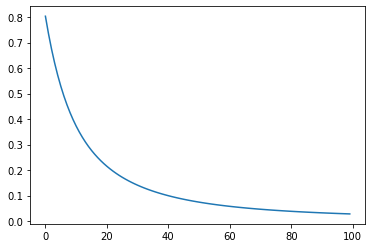

In [51]:
plt.plot(hist.history['loss'])